# Projeto Final

### Curso: Data Science
### Aluno: Mario Rocha Junior

Este é o projeto final do curso de Data Science que consiste em aplicar os conhecimentos adquiridos ao longo do curso. Para isso, foi escolhida uma competição da plataforma Kaggle denominada "Santander Customer Transaction Prediction" que pode ser vista no seguinte endereço: https://www.kaggle.com/c/santander-customer-transaction-prediction/overview.

Esta competição tem como objetivo criar um modelo de Machine Learning que tenha a capacidade de fazer uma previsão se os respectivos clientes farão ou não uma determinada transação bancária futuramente (ou seja, trata-se de uma previsão binária). Para isso, a competição dispõe de 2 (dois) datasets, onde um refere-se ao dataset de treino e o segundo de teste, ou seja, o responsável por fazermos as previsões.

Uma importante observação é que cada dataset apresenta-se de forma anônima onde as "features" somam no total de 200 variáveis e sendo representada por dados numéricos. Além disso, a primeira coluna refere-se à identificação de cada transação e a variável "target", como dito anteriormente, podendo assumir os valores 0 e 1. Outra observação é que cada dataset apresenta 200 mil registros cada um.

## Desenvolvimento do projeto

Aqui iniciaremos o desenvolvimento do projeto e para isso iremos de antemão as bibliotecas que serão utilizadas nesta primeira etapa do trabalho. A seguir iremos carregar os dados em uma variável Python e iremos visualizar os dataframes gerados.

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


### Análise exploratória de dados

Esta é a primeira etapa do projeto onde começamos a entender os dados que temos em mãos. Para isso, utilizaremos gráficos e análises de grandezas estatísticas para definir os rumos que o trabalho tomará em direção à resolução do problema.

In [5]:
# Verificando se há elementos nulos
def null_values(dataframe):
    col = dataframe.columns
    for c in col:
        null = dataframe[c].isna().sum()
        if null != 0:
            print(c, null)
        else:
            print(f'A coluna {c} não tem elementos nulos!')

In [6]:
%%time
null_values(df_train)

A coluna ID_code não tem elementos nulos!
A coluna target não tem elementos nulos!
A coluna var_0 não tem elementos nulos!
A coluna var_1 não tem elementos nulos!
A coluna var_2 não tem elementos nulos!
A coluna var_3 não tem elementos nulos!
A coluna var_4 não tem elementos nulos!
A coluna var_5 não tem elementos nulos!
A coluna var_6 não tem elementos nulos!
A coluna var_7 não tem elementos nulos!
A coluna var_8 não tem elementos nulos!
A coluna var_9 não tem elementos nulos!
A coluna var_10 não tem elementos nulos!
A coluna var_11 não tem elementos nulos!
A coluna var_12 não tem elementos nulos!
A coluna var_13 não tem elementos nulos!
A coluna var_14 não tem elementos nulos!
A coluna var_15 não tem elementos nulos!
A coluna var_16 não tem elementos nulos!
A coluna var_17 não tem elementos nulos!
A coluna var_18 não tem elementos nulos!
A coluna var_19 não tem elementos nulos!
A coluna var_20 não tem elementos nulos!
A coluna var_21 não tem elementos nulos!
A coluna var_22 não tem e

A coluna var_196 não tem elementos nulos!
A coluna var_197 não tem elementos nulos!
A coluna var_198 não tem elementos nulos!
A coluna var_199 não tem elementos nulos!
Wall time: 851 ms


Vemos acima que não existem valores nulos em nenhuma das colunas.

In [7]:
# Verificando a correlação entre as variáveis
df_train.corr()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.028285,0.002073,-0.000785,-0.001070,0.001206,0.003706,-0.001274,0.001244,0.001854,0.001396,...,0.004571,0.000870,-0.004745,-0.003143,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.023608,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,...,-0.000847,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.035303,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,...,-0.004974,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.053000,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,...,-0.000153,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


Note que aparentemente não há nenhuma correlação relevante entre as variáveis, uma vez que para quaisquer 2 variáveis diferentes o respectivo coeficiente é menor do que o módulo de 0.3, representando uma correlação desprezível entre elas. 

In [8]:
# Visualizando os outliers graficamente
def plot_feature_scatter(df1, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure(figsize=(40,2000))
    fig, ax = plt.subplots(50, 4,figsize=(30,600))

    for feature in features:
        i += 1
        plt.subplot(50, 4, i)
        sns.boxplot(y=df1[feature])
        fig.tight_layout()
        plt.xlabel(feature, fontsize=15)
    plt.show()

In [62]:
%%time
features = df_train.columns[2:]
plot_feature_scatter(df_train[::], features)

<Figure size 2880x144000 with 0 Axes>

Wall time: 48min 58s


In [9]:
def show_outliers(dataframe):
    """ Function that prints the maximum and minimun outliers for each column of Dataframe. Plus it gives the total numbers
    of outliers.
    :param dataframe: Dataframe that you want to check the outliers from.
    :return: The outliers itself and total number from each column.
    """
    total = 0
    for c in range(2, len(dataframe.columns)):
        columns_name = dataframe.columns[c]
        inf = dataframe.quantile(0.25)[c - 1] - 1.5 * (dataframe.quantile(0.75)[c - 1] - dataframe.quantile(0.25)[c - 1])
        sup = dataframe.quantile(0.75)[c - 1] + 1.5 * (dataframe.quantile(0.75)[c - 1] - dataframe.quantile(0.25)[c - 1])
        max_outliers = [value for key, value in enumerate(dataframe[columns_name]) if value > sup]
        min_outliers = [value for key, value in enumerate(dataframe[columns_name]) if value < inf]
        max_outliers.sort()
        min_outliers.sort()
        print(f'Coluna {columns_name}:' )
        if len(max_outliers) > 0:
            print(f'-> Outliers maiores: \n{max_outliers};')
        else:
            print(f'-> Outliers maiores: Não há outliers.')
        if len(min_outliers) > 0:
            print()
            print(f'-> Outliers menores: \n{min_outliers};')
        else:
            print(f'-> Outliers menores: Não há outliers.')
        print()
        print(f'Outliers superiores: {len(max_outliers)}. \nOutliers inferiores {len(min_outliers)}.')
        print(f'Total de outliers: {len(max_outliers) + len(min_outliers)}.')
        total += len(max_outliers) + len(min_outliers)
        print()
        max_outliers.clear()
        min_outliers.clear()
    print(f'Total de outliers no dataframe: {total}.')

In [28]:
%%time
show_outliers(df_train)

Coluna var_0:
-> Outliers maiores: 
[19.2157, 19.2175, 19.2203, 19.221, 19.2237, 19.2247, 19.2292, 19.2306, 19.2429, 19.2445, 19.2514, 19.2539, 19.2619, 19.2682, 19.2717, 19.2756, 19.2767, 19.2787, 19.2815, 19.2857, 19.2875, 19.2893, 19.3042, 19.3049, 19.3166, 19.3166, 19.3184, 19.3259, 19.3259, 19.3283, 19.3294, 19.3296, 19.3315, 19.3315, 19.3479, 19.3536, 19.3565, 19.3582, 19.3793, 19.3872, 19.3992, 19.430999999999997, 19.4313, 19.4477, 19.4528, 19.4583, 19.464000000000002, 19.4725, 19.4997, 19.5251, 19.5599, 19.6021, 19.6265, 19.7011, 19.7379, 19.9984, 20.074, 20.315, 20.315];

-> Outliers menores: 
[0.4084, 0.4528, 0.5979, 0.8935, 0.9302, 1.0147, 1.1563, 1.1862, 1.2832, 1.2944, 1.2968, 1.3215, 1.335, 1.335, 1.4059, 1.4449, 1.4566, 1.492, 1.5307, 1.5724, 1.5822, 1.5858, 1.6005, 1.6044, 1.6044, 1.6088, 1.6659, 1.6824, 1.6938, 1.7243, 1.7385, 1.7568, 1.7892, 1.8093, 1.8386, 1.8504, 1.8611, 1.8753, 1.9094, 1.922, 1.9365, 1.9484, 1.9484, 1.9488, 1.9822];

Outliers superiores: 59. 
Outli

Coluna var_12:
-> Outliers maiores: 
[14.5697, 14.5702, 14.5703, 14.5703, 14.5707, 14.5707, 14.5718, 14.5718, 14.5733, 14.5755, 14.5757, 14.5775, 14.5775, 14.5778, 14.5792, 14.5806, 14.5883, 14.5888, 14.5891, 14.5904, 14.5925, 14.5954, 14.595999999999998, 14.5965, 14.5993, 14.5997, 14.6144, 14.6241, 14.6242, 14.6243, 14.6295, 14.6334, 14.6349, 14.6364, 14.6402, 14.6456, 14.6545];

-> Outliers menores: 
[13.4346, 13.4884];

Outliers superiores: 37. 
Outliers inferiores 2.
Total de outliers: 39.

Coluna var_13:
-> Outliers maiores: Não há outliers.

-> Outliers menores: 
[-6.0111];

Outliers superiores: 0. 
Outliers inferiores 1.
Total de outliers: 1.

Coluna var_14:
-> Outliers maiores: 
[14.6805, 14.9377];
-> Outliers menores: Não há outliers.

Outliers superiores: 2. 
Outliers inferiores 0.
Total de outliers: 2.

Coluna var_15:
-> Outliers maiores: 
[15.8633];

-> Outliers menores: 
[13.0769, 13.1852, 13.2339, 13.2406, 13.2406, 13.2745, 13.2777, 13.2853, 13.287, 13.2876, 13.2975, 13.3

Coluna var_23:
-> Outliers maiores: 
[4.5585, 4.5602, 4.5614, 4.5614, 4.5678, 4.5725, 4.5738, 4.5752, 4.5760000000000005, 4.5786, 4.5804, 4.5804, 4.5806, 4.5806, 4.5822, 4.5827, 4.5829, 4.583, 4.5852, 4.5859, 4.5867, 4.5889999999999995, 4.5903, 4.5919, 4.5951, 4.5963, 4.5982, 4.5997, 4.6003, 4.601, 4.602, 4.6023, 4.6023, 4.6024, 4.6046, 4.6059, 4.6081, 4.6081, 4.6118, 4.6129, 4.6134, 4.6165, 4.6165, 4.6168, 4.6232, 4.6246, 4.6257, 4.6267, 4.63, 4.6322, 4.6322, 4.6334, 4.6355, 4.6358, 4.6363, 4.6365, 4.643, 4.6435, 4.6568, 4.6571, 4.6628, 4.665, 4.6659, 4.673, 4.6737, 4.6875, 4.6889, 4.6947, 4.6968, 4.6971, 4.703, 4.704, 4.7043, 4.7352, 4.747, 4.7585, 4.7607, 4.7801, 4.7894, 4.8497, 4.8752];

-> Outliers menores: 
[1.2098, 1.2442, 1.2465, 1.3303, 1.3436, 1.3723, 1.3894, 1.4706, 1.475];

Outliers superiores: 81. 
Outliers inferiores 9.
Total de outliers: 90.

Coluna var_24:
-> Outliers maiores: 
[23.1867, 23.5259, 23.5259, 25.445999999999998];
-> Outliers menores: Não há outliers.

Outli

Coluna var_30:
-> Outliers maiores: Não há outliers.

-> Outliers menores: 
[-34.7984, -33.5249, -32.8542, -32.8506, -32.7813, -32.7551, -32.6482, -32.5985, -32.5959, -32.3598, -32.2984, -32.2907];

Outliers superiores: 0. 
Outliers inferiores 12.
Total de outliers: 12.

Coluna var_31:
-> Outliers maiores: 
[16.4079, 16.408, 16.4103, 16.4111, 16.4133, 16.4148, 16.4163, 16.4164, 16.4167, 16.4203, 16.4224, 16.4241, 16.4253, 16.426, 16.428, 16.4299, 16.4301, 16.4321, 16.4323, 16.4344, 16.4347, 16.4367, 16.4385, 16.4386, 16.4389, 16.4395, 16.4405, 16.4405, 16.4437, 16.4439, 16.4446, 16.445999999999998, 16.4463, 16.4489, 16.4555, 16.4593, 16.4595, 16.463, 16.4632, 16.4677, 16.471, 16.4741, 16.4794, 16.4814, 16.4814, 16.4842, 16.4853, 16.4869, 16.4878, 16.4959, 16.4964, 16.4979, 16.4982, 16.4987, 16.500999999999998, 16.5024, 16.5029, 16.5061, 16.5073, 16.5081, 16.5085, 16.5102, 16.512, 16.5172, 16.5197, 16.5203, 16.5204, 16.5232, 16.524, 16.5252, 16.5266, 16.5275, 16.5284, 16.5285, 16.5285, 

Coluna var_36:
-> Outliers maiores: 
[11.1626, 11.1766, 11.1859, 11.1869, 11.1903, 11.1926, 11.2014, 11.2199, 11.2234, 11.227, 11.2391, 11.2414, 11.2442, 11.253, 11.2732, 11.2742, 11.2746, 11.2752, 11.2752, 11.2861, 11.2957, 11.2972, 11.3074, 11.3097, 11.3099, 11.3123, 11.3192, 11.3258, 11.3362, 11.3366, 11.3643, 11.3653, 11.3658, 11.3719, 11.376, 11.4029, 11.4135, 11.4139, 11.4284, 11.437999999999999, 11.4484, 11.4546, 11.4604, 11.4825, 11.5021, 11.527000000000001, 11.5516, 11.5596, 11.5599, 11.5778, 11.5781, 11.5803, 11.5803, 11.603, 11.6052, 11.6102, 11.6102, 11.6411, 11.6439, 11.6479, 11.6677, 11.672, 11.6797, 11.6857, 11.6995, 11.7198, 11.7198, 11.7308, 11.7406, 11.7593, 11.761, 11.7645, 11.7779, 11.7808, 11.8005, 11.8005, 11.8242, 11.8663, 11.8743, 11.8788, 11.9287, 11.9549, 11.9787, 11.9899, 12.0139, 12.019, 12.093, 12.093, 12.1116, 12.1391, 12.1853, 12.1967, 12.1967, 12.2282, 12.2615, 12.2756, 12.3014, 12.3388, 12.4508, 12.5479, 12.5762, 12.6182, 12.6427, 12.6782, 12.7103, 12.7

Coluna var_40:
-> Outliers maiores: 
[17.6696, 18.1056, 18.1056];

-> Outliers menores: 
[-35.2117, -35.2029, -34.1895, -33.7805, -33.5438, -33.2574, -33.1751, -32.9855, -32.4917, -32.4617, -32.4412, -32.3414, -32.1317, -31.971, -31.9255, -31.8487, -31.7105, -31.6924, -31.6027, -31.5717, -31.5691, -31.5593, -31.4965, -31.4713, -31.4713, -31.4298, -31.3404, -31.331, -31.311, -31.2433, -31.0918, -31.003, -30.9964, -30.9889, -30.9774, -30.9646, -30.9646, -30.9291, -30.9255, -30.925, -30.9026, -30.8942, -30.8901, -30.8256, -30.7738];

Outliers superiores: 3. 
Outliers inferiores 45.
Total de outliers: 48.

Coluna var_41:
-> Outliers maiores: Não há outliers.
-> Outliers menores: Não há outliers.

Outliers superiores: 0. 
Outliers inferiores 0.
Total de outliers: 0.

Coluna var_42:
-> Outliers maiores: 
[13.3551, 13.4123, 13.4313, 13.4696];

-> Outliers menores: 
[8.859, 8.9648, 8.9658, 8.9913, 9.0039, 9.0187, 9.0261, 9.0318, 9.0369, 9.0445, 9.0591, 9.0666, 9.0671, 9.0777, 9.0788, 9.0829, 9

Coluna var_45:
-> Outliers maiores: 
[51.0919, 51.7033, 51.7033, 51.7049, 51.9412, 51.9845, 52.0381, 52.0409, 52.2517, 52.3198, 52.5413, 52.5977, 52.7402, 52.9627, 53.313, 53.3242, 53.4942, 53.8569, 54.1563, 54.7543, 55.0357, 56.5561, 57.2067, 59.3348, 59.5831, 61.019, 62.0844];

-> Outliers menores: 
[-90.2525, -83.1075, -82.2573, -82.1271, -81.4005, -79.6336, -78.9641, -78.7249, -78.6532, -78.3567, -78.3321, -78.2455, -78.0607, -77.6222];

Outliers superiores: 27. 
Outliers inferiores 14.
Total de outliers: 41.

Coluna var_46:
-> Outliers maiores: 
[19.4262, 19.4262, 19.4263, 19.4278, 19.4285, 19.4331, 19.4335, 19.4367, 19.4379, 19.4402, 19.4425, 19.4449, 19.4454, 19.4463, 19.447, 19.4505, 19.4515, 19.4556, 19.4592, 19.4596, 19.4608, 19.4609, 19.4638, 19.4747, 19.4753, 19.4788, 19.4798, 19.4824, 19.4841, 19.4901, 19.4904, 19.4911, 19.4932, 19.4947, 19.4969, 19.4969, 19.5055, 19.5064, 19.5072, 19.5138, 19.5152, 19.5194, 19.5248, 19.5258, 19.5288, 19.5297, 19.5302, 19.5326, 19.5403, 19

Coluna var_53:
-> Outliers maiores: 
[8.2315];

-> Outliers menores: 
[3.3449, 3.3988, 3.4413, 3.4413, 3.4834, 3.5119, 3.5544, 3.5875, 3.6469, 3.6539, 3.6641, 3.6969, 3.7003, 3.7099, 3.7139, 3.7171, 3.7252, 3.7326, 3.7329, 3.7329, 3.7419, 3.7471, 3.7659, 3.7679, 3.7683, 3.7718];

Outliers superiores: 1. 
Outliers inferiores 26.
Total de outliers: 27.

Coluna var_54:
-> Outliers maiores: 
[26.2394, 26.2438, 26.2443, 26.3002, 26.3284, 26.3928, 26.4107, 26.4421, 26.4421, 26.4607, 26.4962, 26.5831, 26.669, 26.6991, 26.7997, 26.9814, 27.1454, 27.1454, 27.2721, 27.5711, 27.7315, 27.8876, 28.1997, 28.4404, 28.5724];

-> Outliers menores: 
[-26.7786, -25.5947, -25.4808, -25.3379, -25.0561, -25.0137, -24.8144, -24.5737, -24.4682, -24.4123, -24.3501, -24.0691, -24.0615];

Outliers superiores: 25. 
Outliers inferiores 13.
Total de outliers: 38.

Coluna var_55:
-> Outliers maiores: Não há outliers.
-> Outliers menores: Não há outliers.

Outliers superiores: 0. 
Outliers inferiores 0.
Total de outl

Coluna var_59:
-> Outliers maiores: 
[11.4606, 11.4635, 11.4663, 11.4686, 11.4696, 11.4705, 11.4952, 11.5043, 11.5063, 11.5073, 11.5078, 11.5083, 11.5166, 11.5228, 11.5264, 11.5289, 11.533, 11.5351, 11.5384, 11.5399, 11.5405, 11.5414, 11.5481, 11.5495, 11.5578, 11.5604, 11.5608, 11.5608, 11.5644, 11.5737, 11.5809, 11.5833, 11.5868, 11.5986, 11.6077, 11.6197, 11.6231, 11.6412, 11.6449, 11.6817, 11.6818, 11.6983, 11.7394, 11.7468, 11.7508, 11.7678, 11.8431, 11.8722, 11.8722, 11.9182, 11.9867];

-> Outliers menores: 
[6.184, 6.3959];

Outliers superiores: 51. 
Outliers inferiores 2.
Total de outliers: 53.

Coluna var_60:
-> Outliers maiores: 
[25.1955];

-> Outliers menores: 
[-2.1006, -0.8519, -0.8176, -0.4902];

Outliers superiores: 1. 
Outliers inferiores 4.
Total de outliers: 5.

Coluna var_61:
-> Outliers maiores: 
[23.302, 23.3448, 23.3602, 23.3819, 23.3889, 23.3937, 23.3974, 23.4138, 23.4418, 23.4574, 23.5129, 23.5342, 23.6497, 23.662, 23.6852, 23.7423, 23.7633, 23.7875, 23.7902, 2

Coluna var_66:
-> Outliers maiores: 
[9.0053, 9.0068, 9.0092, 9.0092, 9.0102, 9.0113, 9.0131, 9.0138, 9.0145, 9.0172, 9.0176, 9.021, 9.0236, 9.0257, 9.0274, 9.0281, 9.0311, 9.032, 9.0322, 9.0373, 9.0374, 9.0469, 9.0564, 9.0577, 9.0583, 9.0586, 9.0598, 9.0673, 9.0676, 9.0711, 9.0743, 9.0749, 9.0788, 9.0831, 9.0905, 9.0923, 9.0945, 9.1039, 9.1065, 9.1301, 9.1315, 9.1351, 9.1403, 9.1413, 9.1428, 9.1498, 9.1803, 9.1815, 9.2039, 9.2043, 9.207, 9.211, 9.2157, 9.2217, 9.2262, 9.2296, 9.2296, 9.2393, 9.2874, 9.2906, 9.2967, 9.3267, 9.3362, 9.3429, 9.3461, 9.3466, 9.3611, 9.3641, 9.3647, 9.371, 9.437999999999999, 9.4458, 9.5461, 9.6029, 9.6188, 9.619, 9.7132];

-> Outliers menores: 
[1.3368, 1.7539, 2.0337, 2.0936, 2.1184, 2.12, 2.1353, 2.1356, 2.1598, 2.2126, 2.2406, 2.2457, 2.2464, 2.27, 2.2734, 2.2815, 2.2815, 2.2884, 2.2965, 2.2994, 2.3003, 2.3049, 2.3205, 2.3417, 2.3433, 2.35, 2.3561, 2.362, 2.367, 2.3757, 2.3783, 2.3875, 2.3901, 2.3903, 2.4009, 2.4017, 2.408, 2.4168, 2.4297, 2.4432, 2.446

Coluna var_73:
-> Outliers maiores: 
[41.9571, 41.958999999999996, 41.9953, 42.0554, 42.1152, 42.1278, 42.2275, 42.2484, 42.3316, 42.3542, 42.3565, 42.4065, 42.4834, 42.5104, 42.7035, 43.0045, 43.3735, 43.4268, 43.4961, 43.5986, 44.2137, 44.5361];
-> Outliers menores: Não há outliers.

Outliers superiores: 22. 
Outliers inferiores 0.
Total de outliers: 22.

Coluna var_74:
-> Outliers maiores: 
[59.6902, 59.7437, 59.8028, 59.8077, 59.8202, 59.8255, 59.8857, 59.9101, 60.0078, 60.0156, 60.0638, 60.0661, 60.0797, 60.0916, 60.1002, 60.102, 60.1142, 60.178999999999995, 60.1893, 60.2405, 60.2592, 60.2961, 60.3185, 60.3352, 60.3429, 60.3516, 60.4037, 60.4231, 60.4721, 60.5284, 60.5603, 60.6185, 60.7958, 60.8318, 60.8648, 60.8683, 60.8683, 60.8812, 60.9258, 60.9354, 61.0405, 61.0567, 61.0632, 61.0632, 61.1837, 61.3181, 61.3664, 61.5565, 61.5951, 61.6449, 61.6449, 61.6756, 61.72, 61.7394, 61.8746, 61.9001, 62.1351, 62.1704, 62.1782, 62.6581, 62.7111, 62.905, 62.9121, 62.9406, 62.9472, 62.9966, 6

Coluna var_82:
-> Outliers maiores: Não há outliers.

-> Outliers menores: 
[-30.0266, -29.8825];

Outliers superiores: 0. 
Outliers inferiores 2.
Total de outliers: 2.

Coluna var_83:
-> Outliers maiores: 
[26.3562, 26.6568, 26.965999999999998, 26.965999999999998, 27.7143];

-> Outliers menores: 
[-24.2201];

Outliers superiores: 5. 
Outliers inferiores 1.
Total de outliers: 6.

Coluna var_84:
-> Outliers maiores: 
[16.4966, 16.7575, 17.7424];

-> Outliers menores: 
[-24.4398, -23.7057, -23.3423, -23.2112, -23.1971, -23.1094, -23.0145, -22.7676, -22.7228, -22.6807, -22.5026, -22.2707, -22.1465, -22.1257, -22.0636, -22.02, -21.923000000000002, -21.814, -21.7996, -21.7523, -21.6815, -21.6551, -21.5013, -21.4609, -21.4406, -21.4268, -21.3497, -21.2841, -21.2652, -21.2093, -21.1945, -21.1937, -21.1455, -21.1292, -21.0303];

Outliers superiores: 3. 
Outliers inferiores 35.
Total de outliers: 38.

Coluna var_85:
-> Outliers maiores: 
[30.745, 30.9763, 31.0172, 32.9011];
-> Outliers menores:

Coluna var_94:
-> Outliers maiores: Não há outliers.
-> Outliers menores: Não há outliers.

Outliers superiores: 0. 
Outliers inferiores 0.
Total de outliers: 0.

Coluna var_95:
-> Outliers maiores: 
[1.6227, 1.6272, 1.6284, 1.6324, 1.6345, 1.6589, 1.6740000000000002, 1.6880000000000002, 1.6927, 1.706, 1.7107, 1.7275, 1.7785, 1.804];

-> Outliers menores: 
[-2.4324, -2.4257, -2.3331, -2.2624, -2.2452, -2.214, -2.1897, -2.1897, -2.1889, -2.1813, -2.1697, -2.1525, -2.1415, -2.1348, -2.1341, -2.1069999999999998, -2.0897, -2.0847, -2.0698, -2.065, -2.0521, -2.051, -2.0413, -2.033, -2.0273, -2.0198, -2.0079, -2.0053, -2.0053, -2.0006, -2.0006, -2.0005, -1.9991, -1.9924, -1.9884, -1.9869, -1.9852, -1.9757, -1.9723, -1.9718, -1.9715, -1.97, -1.9697, -1.9696, -1.9671, -1.96, -1.96, -1.9577, -1.9552, -1.9475, -1.9456, -1.9403, -1.9395, -1.9353, -1.9334, -1.9334, -1.9332, -1.9329, -1.9321, -1.9318, -1.9292, -1.9278, -1.9235, -1.9228, -1.9198, -1.912, -1.9115, -1.9108, -1.9069999999999998, -1.906

Coluna var_104:
-> Outliers maiores: 
[17.1113, 17.1125, 17.1132, 17.1133, 17.1143, 17.1149, 17.1155, 17.1178, 17.1185, 17.1192, 17.1213, 17.1223, 17.1223, 17.1293, 17.1294, 17.1308, 17.133, 17.1344, 17.1424, 17.1437, 17.1445, 17.1458, 17.1459, 17.1497, 17.1512, 17.154, 17.1544, 17.1558, 17.1594, 17.16, 17.1633, 17.1679, 17.1692, 17.1702, 17.1748, 17.1767, 17.1803, 17.1803, 17.1804, 17.1834, 17.1847, 17.1868, 17.1939, 17.1944, 17.1944, 17.1997, 17.2003, 17.2011, 17.2014, 17.2053, 17.206, 17.2066, 17.2083, 17.2087, 17.2091, 17.2136, 17.2162, 17.2162, 17.2214, 17.2222, 17.2246, 17.2271, 17.2321, 17.2345, 17.2405, 17.2511, 17.2529, 17.2618, 17.2623, 17.2644, 17.2657, 17.2692, 17.274, 17.2742, 17.2763, 17.2798, 17.2816, 17.2836, 17.2837, 17.2842, 17.2903, 17.2922, 17.2941, 17.2942, 17.2995, 17.2997, 17.3006, 17.3006, 17.3091, 17.3094, 17.3116, 17.3121, 17.3152, 17.3204, 17.3216, 17.3231, 17.3246, 17.325, 17.329, 17.333, 17.3334, 17.3384, 17.3412, 17.3465, 17.3488, 17.3495, 17.3503, 17.3543

Coluna var_107:
-> Outliers maiores: 
[40.1877, 40.1941, 40.2048, 40.2218, 40.2362, 40.2462, 40.2714, 40.2962, 40.3053, 40.3223, 40.3268, 40.346, 40.346, 40.3606, 40.3777, 40.3936, 40.4024, 40.4301, 40.4507, 40.4546, 40.4701, 40.5057, 40.524, 40.5383, 40.5785, 40.601, 40.6379, 40.6886, 40.7158, 40.7162, 40.7233, 40.7736, 40.8088, 40.8997, 40.8997, 40.9165, 40.9357, 40.9357, 40.9665, 40.9728, 41.0439, 41.0474, 41.0575, 41.0757, 41.0794, 41.1459, 41.1596, 41.4132, 41.4456, 41.494, 41.8067, 41.8183, 41.8526, 41.9152, 41.9217, 42.1173, 42.1312, 42.1341, 42.1579, 42.3031, 42.3944, 42.4523, 42.5682, 42.6067, 42.6187, 42.6192, 42.6204, 42.6216, 42.6384, 42.8082, 43.0726, 43.174, 43.4212, 43.6414, 43.7647, 43.8129, 43.8129, 43.8508, 43.9863, 44.3131, 44.8855, 46.3795];

-> Outliers menores: 
[-5.898, -5.3046, -5.2093, -5.0735, -4.9977, -4.7523];

Outliers superiores: 82. 
Outliers inferiores 6.
Total de outliers: 88.

Coluna var_108:
-> Outliers maiores: Não há outliers.
-> Outliers menores: N

Coluna var_116:
-> Outliers maiores: 
[7.4538, 7.5257, 7.5675, 8.1207];

-> Outliers menores: 
[-3.1630000000000003, -2.929, -2.806, -2.7715, -2.7659, -2.728, -2.7148, -2.7148, -2.6769, -2.667, -2.6604, -2.5786];

Outliers superiores: 4. 
Outliers inferiores 12.
Total de outliers: 16.

Coluna var_117:
-> Outliers maiores: 
[54.9144, 54.9256, 55.0076, 55.0296, 55.0533, 55.0638, 55.0785, 55.2547, 55.3314, 55.3499, 55.4386, 55.4609, 55.6038, 55.6871, 55.7649, 55.8056, 55.8347, 55.9346, 56.0402, 56.2945, 56.4079, 56.4532, 56.7851, 57.0035, 57.0708, 57.0767, 57.2909, 57.4152, 57.4709, 57.4799, 57.5645, 57.6737, 58.0067, 58.0075, 58.0865, 58.3648, 58.986000000000004, 59.1217, 59.431000000000004, 59.4817, 59.8348, 59.8776, 59.9086, 61.638000000000005, 62.9512, 64.8109];

-> Outliers menores: 
[-31.8369, -30.5794, -30.0526, -29.4052, -28.9432, -27.6136, -27.4995, -27.4391, -27.0272, -27.0012, -26.986, -26.8142, -26.2999, -26.0636, -25.7639, -25.7367, -25.7083, -25.6548, -25.6316, -25.5748, -25

Coluna var_125:
-> Outliers maiores: 
[13.427999999999999, 13.4282, 13.4287, 13.4294, 13.4295, 13.4295, 13.4302, 13.4309, 13.4313, 13.4313, 13.4314, 13.4316, 13.432, 13.4326, 13.4329, 13.4329, 13.4331, 13.4333, 13.4334, 13.4343, 13.435, 13.4373, 13.4373, 13.4375, 13.4376, 13.4376, 13.4378, 13.437999999999999, 13.4382, 13.4384, 13.4384, 13.4393, 13.4394, 13.4396, 13.4397, 13.4404, 13.4405, 13.4406, 13.440999999999999, 13.440999999999999, 13.4416, 13.4416, 13.4421, 13.4432, 13.4433, 13.4434, 13.4435, 13.4441, 13.4447, 13.4452, 13.4465, 13.447000000000001, 13.4474, 13.4479, 13.4486, 13.4488, 13.4495, 13.4498, 13.4508, 13.4516, 13.4519, 13.4522, 13.4528, 13.4533, 13.4543, 13.4543, 13.4555, 13.4557, 13.457, 13.4574, 13.4578, 13.4578, 13.458, 13.458, 13.4589, 13.4593, 13.4598, 13.46, 13.46, 13.4605, 13.4605, 13.4618, 13.4635, 13.4662, 13.4666, 13.4666, 13.4668, 13.4673, 13.4676, 13.4692, 13.4705, 13.4722, 13.4723, 13.4734, 13.4745, 13.4753, 13.4753, 13.4755, 13.4755, 13.4759, 13.4773, 13.477

Coluna var_134:
-> Outliers maiores: Não há outliers.

-> Outliers menores: 
[-24.2546];

Outliers superiores: 0. 
Outliers inferiores 1.
Total de outliers: 1.

Coluna var_135:
-> Outliers maiores: 
[19.7257, 21.4128];

-> Outliers menores: 
[-31.3808, -30.2202, -30.0838, -29.1039, -29.0644, -28.4935, -27.8788, -27.5689, -27.5308, -27.4661, -27.3458, -27.3344, -27.2754, -27.2217, -27.1658, -27.0425, -26.9917, -26.9293, -26.9016, -26.7903, -26.7786, -26.7313, -26.7311, -26.6741, -26.6667];

Outliers superiores: 2. 
Outliers inferiores 25.
Total de outliers: 27.

Coluna var_136:
-> Outliers maiores: Não há outliers.

-> Outliers menores: 
[-9.9493, -9.2764];

Outliers superiores: 0. 
Outliers inferiores 2.
Total de outliers: 2.

Coluna var_137:
-> Outliers maiores: Não há outliers.
-> Outliers menores: Não há outliers.

Outliers superiores: 0. 
Outliers inferiores 0.
Total de outliers: 0.

Coluna var_138:
-> Outliers maiores: 
[14.0026, 14.0119, 14.0195, 14.0371, 14.0409, 14.0456, 14.054

Coluna var_143:
-> Outliers maiores: 
[20.6954, 20.7012, 20.7219, 20.721999999999998, 20.7246, 20.7307, 20.7349, 20.7353, 20.7353, 20.7358, 20.7473, 20.7574, 20.759, 20.7892, 20.7909, 20.8, 20.8237, 20.8255, 20.8272, 20.8312, 20.8331, 20.8424, 20.8552, 20.8689, 20.8818, 20.8904, 20.8929, 20.9307, 20.9315, 20.9801, 20.9916, 20.9958, 21.0144, 21.0381, 21.0417, 21.0819, 21.096, 21.1015, 21.1076, 21.1139, 21.1163, 21.1256, 21.1287, 21.1535, 21.1687, 21.1697, 21.1776, 21.1786, 21.2085, 21.2096, 21.2227, 21.2325, 21.2325, 21.2433, 21.2716, 21.3132, 21.3242, 21.3349, 21.3452, 21.3883, 21.3922, 21.3982, 21.4559, 21.4584, 21.5004, 21.5559, 21.5913, 21.6072, 21.6176, 21.6891, 21.694000000000003, 21.7062, 21.7263, 21.8407, 21.8453, 21.853, 22.0822, 22.1262, 22.5875, 22.6916];

-> Outliers menores: 
[2.8068, 3.3542, 3.363, 3.4162, 3.5921, 3.7041, 3.7609, 3.7655, 3.7725, 3.7778, 3.7778, 3.8861, 3.8866, 3.9231, 3.9255, 3.9344, 3.9375, 3.9461, 3.9514, 3.9619, 3.9745, 3.9806, 3.9809, 3.9891, 4.0238, 4

Coluna var_147:
-> Outliers maiores: 
[18.2182, 18.2245, 18.2263, 18.2398, 18.2616, 18.2878, 18.2999, 18.2999, 18.3061, 18.3204, 18.3528, 18.3996, 18.417, 18.45, 18.4513, 18.4858, 18.555, 18.6003, 18.6573, 18.683, 18.7161, 18.7252, 18.7252, 18.8155, 18.8258, 18.8328, 18.838, 18.8431, 18.8431, 18.9175, 19.0578, 19.0587, 19.0816, 19.0816, 19.1006, 19.1257, 19.2453, 19.28, 19.2809, 19.3088, 19.3565, 19.5118, 19.5743, 19.6237, 19.9536, 20.0413, 20.0571, 20.0571, 20.1189, 20.2619, 20.2727, 20.2952, 20.4609, 21.038, 21.038, 21.2364, 22.1494];

-> Outliers menores: 
[-29.984, -29.8023, -28.5667, -27.6045, -27.4296, -27.3893, -27.3767, -27.1238, -26.8856, -26.8642, -26.8518, -26.8267, -26.3443, -26.3304, -26.2424, -26.2317, -26.228, -26.0466, -25.9889, -25.9622, -25.9393, -25.914, -25.8926, -25.8689, -25.8381, -25.8298, -25.8004, -25.7895, -25.6896, -25.6032, -25.5886, -25.5837, -25.5715, -25.4616, -25.4395, -25.4056, -25.3759, -25.334, -25.3177, -25.2958, -25.2803, -25.2702, -25.1371, -25.101

Coluna var_153:
-> Outliers maiores: 
[22.89, 22.8953, 23.4661, 24.0075];
-> Outliers menores: Não há outliers.

Outliers superiores: 4. 
Outliers inferiores 0.
Total de outliers: 4.

Coluna var_154:
-> Outliers maiores: 
[21.9094, 22.0634, 22.4122, 23.0958, 23.2428, 23.2428];

-> Outliers menores: 
[-8.1966];

Outliers superiores: 6. 
Outliers inferiores 1.
Total de outliers: 7.

Coluna var_155:
-> Outliers maiores: 
[14.1432, 14.1442, 14.1481, 14.1498, 14.157, 14.1598, 14.1701, 14.1705, 14.1712, 14.1723, 14.1728, 14.1965, 14.2016, 14.2152, 14.2194, 14.2209, 14.2303, 14.2365, 14.2434, 14.2513, 14.2513, 14.261, 14.2738, 14.2799, 14.2944, 14.2974, 14.3022, 14.3138, 14.3156, 14.3156, 14.3245, 14.3311, 14.3316, 14.3316, 14.338, 14.3758, 14.3898, 14.4013, 14.4026, 14.4051, 14.4064, 14.423, 14.423, 14.4316, 14.4328, 14.4328, 14.4336, 14.4338, 14.4425, 14.457, 14.4725, 14.4745, 14.4824, 14.4962, 14.5013, 14.5128, 14.5157, 14.5162, 14.5187, 14.5192, 14.5272, 14.5324, 14.5407, 14.5407, 14.5555

Coluna var_164:
-> Outliers maiores: Não há outliers.

-> Outliers menores: 
[-19.9977];

Outliers superiores: 0. 
Outliers inferiores 1.
Total de outliers: 1.

Coluna var_165:
-> Outliers maiores: 
[33.9764, 34.0074, 34.0193, 34.0247, 34.0337, 34.0337, 34.0363, 34.0855, 34.0992, 34.0995, 34.1428, 34.1428, 34.1721, 34.1923, 34.2126, 34.2258, 34.243, 34.2697, 34.2844, 34.285, 34.3049, 34.3259, 34.3284, 34.4071, 34.4419, 34.4445, 34.4742, 34.5484, 34.661, 34.6623, 34.6642, 34.6861, 34.7234, 34.7537, 34.7777, 34.865, 34.8705, 34.9236, 34.9909, 35.0555, 35.1408, 35.1512, 35.2963, 35.2998, 35.3198, 35.5353, 35.6606, 35.6606, 35.7839, 35.79, 35.8177, 35.8306, 36.0108, 36.1142, 36.1299, 36.2359, 36.817, 38.3322];

-> Outliers menores: 
[3.8167, 4.115, 4.1714, 4.2755, 4.4827, 4.5021, 4.6185, 4.6278, 4.6282, 4.649, 4.6537, 4.7534];

Outliers superiores: 58. 
Outliers inferiores 12.
Total de outliers: 70.

Coluna var_166:
-> Outliers maiores: 
[4.0567, 4.0612, 4.0675, 4.0697, 4.0711, 4.0717, 4.0

Coluna var_171:
-> Outliers maiores: 
[14.4736, 14.5306, 14.5486, 14.6089, 14.6452, 14.7428, 14.7495, 14.7496, 14.8151, 14.8208, 14.8351, 14.9065, 14.925, 14.9332, 15.0098, 15.1235, 15.1342, 15.1489, 15.1649, 15.2165, 15.2296, 15.4067, 15.6399, 15.7241, 15.7935, 16.0791, 16.105, 16.1639, 16.2469, 16.5438, 16.819000000000003, 17.2421, 17.2547, 17.3604, 17.4534, 17.9173];

-> Outliers menores: 
[-22.4793, -19.7856, -19.7811, -19.5919, -19.4463, -19.3355, -19.1708, -19.1589, -19.1568, -19.1105, -19.0124, -18.9963, -18.8639, -18.8121, -18.8015, -18.7836, -18.7086, -18.5483, -18.5219, -18.4021, -18.3632, -18.3206, -18.1187, -18.0693, -18.0626, -17.9628, -17.9535, -17.8748, -17.8109, -17.7963, -17.7509, -17.7241, -17.7067, -17.6509, -17.6384, -17.6308, -17.554000000000002, -17.5353, -17.5346, -17.5265, -17.5132, -17.4807, -17.4651, -17.4571, -17.4411, -17.4372, -17.4265, -17.4043, -17.3728, -17.3532, -17.3488, -17.3282, -17.3247, -17.3023, -17.2907, -17.2671, -17.2047, -17.1995, -17.183, -17

Coluna var_178:
-> Outliers maiores: 
[24.5046, 24.5258, 24.5969, 24.6105, 24.6157, 24.6451, 24.7083, 24.9525, 24.989, 25.072, 25.1076, 25.1612, 25.2165, 25.2214, 25.255, 25.3512, 25.3774, 25.4083, 25.4366, 25.5121, 25.5261, 25.8841, 26.0237, 26.0664, 26.0876, 26.1079, 26.2255, 26.3741, 27.0034, 27.142, 27.2128, 27.2657, 27.5684, 27.9578, 29.8413];

-> Outliers menores: 
[-29.2734, -28.7639, -28.4351, -28.232, -28.0551, -27.026999999999997, -26.9788, -26.5136];

Outliers superiores: 35. 
Outliers inferiores 8.
Total de outliers: 43.

Coluna var_179:
-> Outliers maiores: 
[10.042, 10.0421, 10.0422, 10.0431, 10.0434, 10.0436, 10.0438, 10.0445, 10.0447, 10.0457, 10.0479, 10.0483, 10.0499, 10.052999999999999, 10.052999999999999, 10.0547, 10.0554, 10.0556, 10.0563, 10.0566, 10.0575, 10.0582, 10.0587, 10.0588, 10.059, 10.0597, 10.0598, 10.0605, 10.0611, 10.0611, 10.0611, 10.0627, 10.0631, 10.0633, 10.0647, 10.065, 10.0662, 10.0665, 10.0674, 10.0681, 10.0683, 10.0692, 10.0707, 10.0708, 10.071

Coluna var_180:
-> Outliers maiores: 
[12.5106, 12.7505];

-> Outliers menores: 
[-22.0374, -19.6851, -19.4936, -19.4804, -19.4382, -19.3687, -19.0999, -19.0756, -19.0263, -18.8656, -18.859, -18.7851, -18.7257, -18.6721, -18.6091, -18.6091, -18.5846, -18.584, -18.5766, -18.5385, -18.4426, -18.4426, -18.4396, -18.4384, -18.4258, -18.3873, -18.3359, -18.3319, -18.2458, -18.2263, -18.1879, -18.1802];

Outliers superiores: 2. 
Outliers inferiores 32.
Total de outliers: 34.

Coluna var_181:
-> Outliers maiores: 
[13.902999999999999, 13.9045, 13.9338, 13.9344, 13.9526, 14.0325, 14.1573, 14.3606, 14.3939];

-> Outliers menores: 
[5.4165, 5.5273, 5.6005, 5.6032, 5.6379, 5.6379, 5.6483, 5.6818, 5.7074, 5.7182, 5.7261, 5.8182, 5.8224, 5.8349, 5.8629, 5.8963, 5.8963, 5.9037, 5.9051, 5.9154, 5.921, 5.9341, 5.9477, 5.9599, 5.9917, 5.9973, 5.9991, 6.0054, 6.007000000000001, 6.0072, 6.0136, 6.017, 6.0205, 6.0214, 6.0606, 6.0646, 6.0693, 6.0789, 6.0821, 6.0909, 6.0995, 6.1181, 6.1208, 6.1364, 6.1431, 

Coluna var_187:
-> Outliers maiores: Não há outliers.

-> Outliers menores: 
[-47.7536, -46.5981, -46.4889];

Outliers superiores: 0. 
Outliers inferiores 3.
Total de outliers: 3.

Coluna var_188:
-> Outliers maiores: 
[27.1262, 27.1308, 27.1434, 27.1729, 27.2132, 27.2184, 27.2345, 27.2461, 27.2582, 27.3802, 27.3888, 27.414, 27.5998, 27.6466, 27.7079, 27.7919, 27.9244, 27.947, 27.9974, 28.1174, 28.5161, 28.6566, 29.3303];
-> Outliers menores: Não há outliers.

Outliers superiores: 23. 
Outliers inferiores 0.
Total de outliers: 23.

Coluna var_189:
-> Outliers maiores: 
[3.6967, 3.7923, 3.8237, 3.8902, 4.0341];

-> Outliers menores: 
[-2.5543, -2.4553, -2.3117, -2.2795, -2.2795, -2.2253, -2.2069, -2.1977, -2.1939, -2.1888];

Outliers superiores: 5. 
Outliers inferiores 10.
Total de outliers: 15.

Coluna var_190:
-> Outliers maiores: 
[16.1058, 16.1663, 16.1942, 16.2116, 16.2683, 16.4267, 16.4267, 16.4301, 16.4687, 16.5594, 16.5723, 16.5767, 16.5871, 16.6144, 16.6242, 16.6541, 16.6637, 1

Coluna var_193:
-> Outliers maiores: 
[14.6379, 14.6391, 14.6446, 14.6446, 14.6463, 14.6682, 14.673, 14.6862, 14.6862, 14.6946, 14.6954, 14.7041, 14.7061, 14.7081, 14.7083, 14.7119, 14.7159, 14.7393, 14.7489, 14.7522, 14.7569, 14.7591, 14.7592, 14.7676, 14.7815, 14.7835, 14.7896, 14.7958, 14.8194, 14.8253, 14.8317, 14.8387, 14.8488, 14.8617, 14.8716, 14.8716, 14.8845, 14.907, 14.9088, 14.9101, 14.9216, 14.9333, 14.94, 14.9597, 14.967, 14.9694, 14.9745, 15.0172, 15.0264, 15.04, 15.0476, 15.0613, 15.0626, 15.0633, 15.0766, 15.100999999999999, 15.1032, 15.145, 15.1508, 15.1526, 15.1633, 15.1682, 15.1692, 15.2096, 15.24, 15.2599, 15.2701, 15.2709, 15.2932, 15.3023, 15.3198, 15.328, 15.3293, 15.3596, 15.3768, 15.4334, 15.4451, 15.4538, 15.4651, 15.5226, 15.5362, 15.5857, 15.5884, 15.5907, 15.6004, 15.6152, 15.6324, 15.6459, 15.6906, 15.7011, 15.7197, 15.7269, 15.8103, 15.815, 15.9227, 15.9646, 15.9667, 16.0434, 16.0801, 16.1033, 16.1334, 16.2056, 16.2372, 16.4447, 16.4623, 16.5261, 16.6146,

In [30]:
print(f'Porcentagem de outliers: {(26536 * 100) / 200000}%')

Porcentagem de outliers: 13.268%


In [10]:
def max_min_values(dataframe):
    """ Function that returns the maximum and minimun values each column of Dataframe but outliers. Plus it gives the 
    total numbers of outliers.
    :param dataframe: Dataframe that you want to study.
    :return: Dataframe with both maximum and minimum values.
    """
    dictionary = {}
    for c in range(2, len(dataframe.columns)):
        columns_name = dataframe.columns[c]
        inf = dataframe.quantile(0.25)[c - 1] - 1.5 * (dataframe.quantile(0.75)[c - 1] - dataframe.quantile(0.25)[c - 1])
        sup = dataframe.quantile(0.75)[c - 1] + 1.5 * (dataframe.quantile(0.75)[c - 1] - dataframe.quantile(0.25)[c - 1])
        dictionary[columns_name] = [inf, sup]
        df = pd.DataFrame(data=dictionary, index=['Menor', 'Maior'])
    return df

In [32]:
%%time
max_min_values(df_train)

Wall time: 37min 8s


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Menor,1.997325,-13.8880,3.031137,0.649038,6.31625,-29.388075,2.91475,6.20515,-10.20135,3.670363,...,-9.756362,-1.375287,-2.199813,-7.8472,8.479713,-4.17115,-14.7024,6.24205,7.477163,-35.276387
Maior,19.214725,10.5066,18.208038,12.929137,15.82805,19.112525,7.85595,26.84155,10.82145,11.532862,...,16.103738,16.045212,6.039088,14.6376,27.546612,3.83005,19.3122,11.60405,24.417262,28.904712


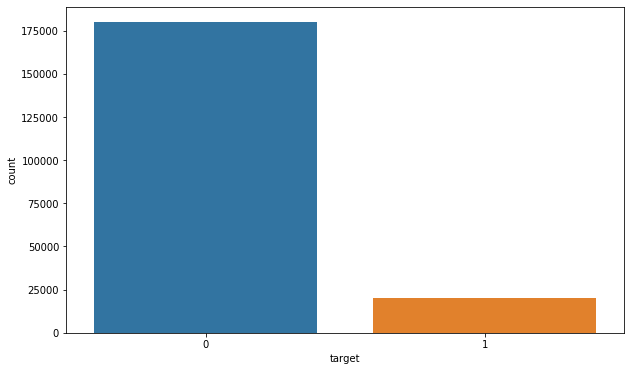

Wall time: 2.49 s


In [11]:
%%time
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df_train, x='target')
plt.show()

Wall time: 759 ms


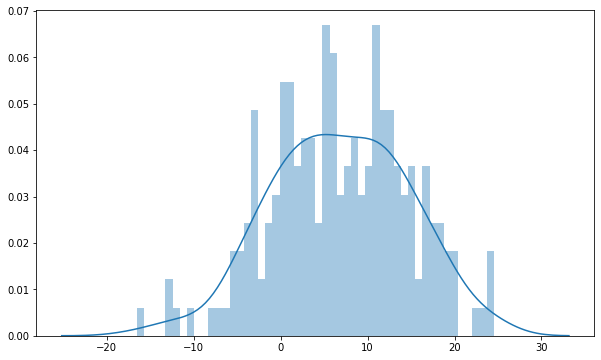

In [13]:
%%time
# Distribuição da média de cada feature
fig = plt.figure(figsize=(10,6))
col = df_train.columns[2:]
medias = []
for c in col:
    media = df_train[c].mean()
    medias.append(media)
sns.distplot(a=medias, bins=50)

Wall time: 260 ms


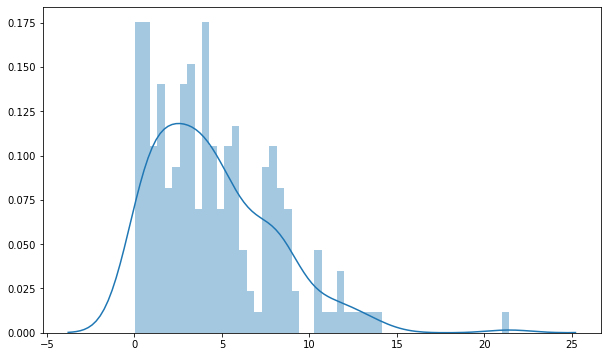

In [14]:
%%time
# Distribuição do desvio padrão de cada feature
fig = plt.figure(figsize=(10,6))
col = df_train.columns[2:]
stds = []
for c in col:
    std = df_train[c].std()
    stds.append(std)
sns.distplot(a=stds, bins=50)

Wall time: 269 ms


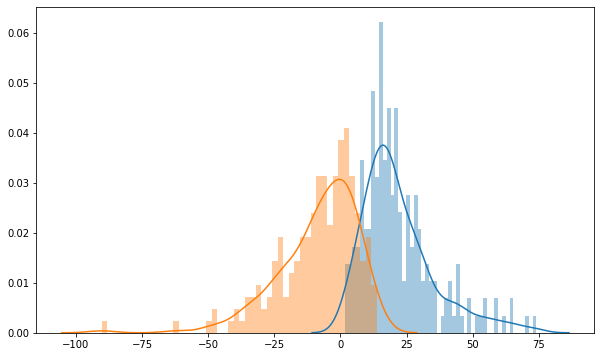

In [15]:
%%time
fig = plt.figure(figsize=(10,6))
col = df_train.columns[2:]
maxi = []
mini = []
for c in col:
    maximum = df_train[c].max()
    minimum = df_train[c].min()
    maxi.append(maximum)
    mini.append(minimum)
sns.distplot(a=maxi, bins=50)
sns.distplot(a=mini, bins=50)

In [16]:
index = []
def delete_outliers(dataframe):
    for c in range(2, len(dataframe.columns)):
        columns_name = dataframe.columns[c]
        inf = dataframe.quantile(0.25)[c - 1] - 1.5 * (dataframe.quantile(0.75)[c - 1] - dataframe.quantile(0.25)[c - 1])
        sup = dataframe.quantile(0.75)[c - 1] + 1.5 * (dataframe.quantile(0.75)[c - 1] - dataframe.quantile(0.25)[c - 1])
        for key, value in enumerate(dataframe[columns_name]):
            if value > sup or value < inf:
                index.append(key)
    df_copy = dataframe.copy()
    df_copy.drop(axis=0, index=index, inplace=True, errors='ignore')
    return df_copy

In [39]:
%%time
no_outliers_train = delete_outliers(df_train)

Wall time: 34min 16s


In [40]:
df_train.shape

(200000, 202)

In [41]:
no_outliers_train.shape

(175104, 202)

In [42]:
print(f'Foram retirados {200000 - 175104} outliers, representando {((200000 - 175104) * 100 / 200000)}% da base original.')

Foram retirados 24896 outliers, representando 12.448% da base original.


### Pré-processamento dos dados

Como dito anteriormente, nosso objetivo neste projeto é criar um modelo de Machine Learning capaz de fazer uma previsão se um cliente do banco fará ou não uma determinada transação (baseado em seus dados pessoais). Entretanto, antes de chegar a tal parte precisamos fazer um pré-processamento dos dados para termos certeza que usaremos dados com uma certa qualidade, uma vez que esta qualidade está diretamente relacionada à acurácia do modelo em questão. Segue então este processo abaixo.

#### Standard Scaler

O comando Standard Scaler é muito utilizado para colocar todos os dados de cada feature em uma mesma escala.

In [22]:
# Divisão entre base previsores (features) e classe (target)
previsores = df_train.iloc[:, 2:].values
classe = df_train.iloc[:,1].values

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
previsores = scaler.fit_transform(previsores)

In [26]:
previsores

array([[-0.57710174, -1.27373702,  0.45170728, ..., -0.37396811,
        -1.02639785,  0.21413482],
       [ 0.26995857, -0.62213756,  1.19036045, ..., -0.12939961,
         0.82541712,  0.50568523],
       [-0.68111341, -0.2760664 ,  0.51698836, ..., -0.69514059,
        -0.38144932,  0.35668144],
       ...,
       [ 0.17870987, -0.84546901, -0.07667568, ..., -0.20904171,
        -0.67680579,  0.72102365],
       [-0.31746727, -1.72398014,  1.09630117, ...,  1.22180338,
        -0.11352617, -1.01298853],
       [ 0.06456676, -1.00810962,  0.53130173, ..., -0.78389704,
        -1.24290845,  0.33196403]])

### Criação do Modelo

Nesta etapa do projeto iremos criar um modelo utilizando o algorítmo de Machine Learning conhecido como Naive Bayes. O princípio do algorítmo se baseia em criar uma tabela de probabilidade a partir dos dados de treino e a seguir calcular a probabilidade de cada registro da base de treino se enquadrar nas classes 1 ou 2.

In [19]:
# Importando as bibliotecas necessárias
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [20]:
# Separação da base de dados em treino e teste
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

In [51]:
%%time
# Criação do modelo
resultados = []
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(previsores.shape[0], 1))):
    classificador = GaussianNB()
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento])
    previsoes = classificador.predict(previsores[indice_teste])
    precisao = accuracy_score(classe[indice_teste], previsoes)
    resultados.append(precisao)

Wall time: 46.4 s
Parser   : 118 ms


In [52]:
resultados = np.array(resultados)
resultados.mean()

0.9213749999999999

Resultado:

Este modelo criado com o algorítmo Naive Bayes apresentou uma acurácia de aproximadamente 92,13% ao usarmos a base completa, ou seja, com a presença dos outliers. Note ainda que neste caso o pré-processamento com o Scaler não fez diferença e apresentou exatamente o mesmo resultado sem realizá-lo.
Realizando o mesmo com a base sem os outliers o resultado ficou praticamente o mesmo, apresentando uma leve superioridade verificada apenas na 6ª casa decimal.

### Testando outros modelos

Nesta etapa, tentaremos melhorar o modelo conseguido com o Naive Bayes e para isso usaremos outros algorítmos para criar diferentes modelos para no fim, compararmos os seus resultados. 

Aqui, vale uma observação: usaremos aqui a base de dados com os outliers, uma vez que sua presença não fez diferença significativa para precisão do modelo. 

#### 1) Random Forest 

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
%%time
resultados = []
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(previsores.shape[0], 1))):
    classificador = RandomForestClassifier(n_estimators=10, criterion='entropy')
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento])
    previsoes = classificador.predict(previsores[indice_teste])
    precisao = accuracy_score(classe[indice_teste], previsoes)
    resultados.append(precisao)

Wall time: 20min 31s


In [72]:
resultados = np.array(resultados)
resultados.mean()

0.899785

### 2) K-nearest neighbours (KNN)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
%%time
resultados = []
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(previsores.shape[0], 1))):
    classificador = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento])
    previsoes = classificador.predict(previsores[indice_teste])
    precisao = accuracy_score(classe[indice_teste], previsoes)
    resultados.append(precisao)

Wall time: 7h 31min 4s


In [45]:
resultados = np.array(resultados)
resultados.mean()

0.8994349999999999

Resultado: Acurácia de aproximadamente 89,94%.

### 3) Regressão Logística

In [17]:
from sklearn.linear_model import LogisticRegression

In [27]:
%%time
resultados = []
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(previsores.shape[0], 1))):
    classificador = LogisticRegression()
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento])
    previsoes = classificador.predict(previsores[indice_teste])
    precisao = accuracy_score(classe[indice_teste], previsoes)
    resultados.append(precisao)

Wall time: 58.3 s


In [28]:
resultados = np.array(resultados)
resultados.mean()

0.9142199999999999

Resultado: Acurácia de aproximadamente 91,42%.

### 4) Redes Neurais Artificiais

In [31]:
from sklearn.neural_network import MLPClassifier

In [37]:
%%time
resultados = []
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(previsores.shape[0], 1))):
    classificador = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,100,100), batch_size=200)
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento])
    previsoes = classificador.predict(previsores[indice_teste])
    precisao = accuracy_score(classe[indice_teste], previsoes)
    resultados.append(precisao)


Wall time: 2h 26min 27s


In [38]:
resultados = np.array(resultados)
resultados.mean()

0.873365

Resultado: Acurácia de aproximadamente 87,34%.

### Resultados

### Conclusão

Ao analizarmos os resultados obtidos concluímos que o melhor modelo obtido foi utlizando o algorítmo Naive Bayes, que atingiu uma acurácia de 92,14% de precisão tanto para a base com outliers quanto para a base sem a presença deles, ou seja, ambos os modelos ficaram "empatados" quanto a sua precisão. Verificamos ainda que para o pré-procesamento também nao fez diferença e os resultados foram os mesmos fazendo-o ou não.